# Pandas part 2: Data types and missing values

Notebook developed by Sam Maurer

In [50]:
import numpy as np
import pandas as pd

## 1. Working with data types

Python and Pandas will automatically assign appropriate types to your data.

In [51]:
df = pd.DataFrame({'x': [1.4, 5.98, 12.0, 0], 
                   'y': [17, 40, 52, 0], 
                   'z': ['tall', 'tall', 'tall', 'small']})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
x    4 non-null float64
y    4 non-null int64
z    4 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


("Object" is what Pandas calls anything that's not numeric.)

You can convert types like this:

In [53]:
df['x'].astype('int')

0     1
1     5
2    12
3     0
Name: x, dtype: int64

In [54]:
df['x'].dtype

dtype('float64')

Reminder that when you apply a function to a Series or DataFrame, Python will calculate the result, but generally _not save it anywhere_ unless you use an `=` to assign the values to a new or existing variable/column.

A data type of `int64` means integers with 64 bits of precision, which supports up to 19 decimal digits or so. The default bit precision varies from platform to platform, so it's safer to refer to generic types like `int` in your code, rather than specific ones, unless you have a good reason.

## 2. Working with missing values

The standard way to denote a missing value in the Python data science world is with NumPy's `np.nan` object. 

In [55]:
df = pd.DataFrame({'x': [1.4, 5.98, np.nan, 0], 
                   'y': [17, 40, 52, -1]})

In [56]:
df

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,-1


As you will recall from lecture, integers can't be missing! Mixing a NaN with integers  will cause Pandas to convert the whole column in to floating-point values. (This is not the end of the world, but generally better to avoid.)

When you're loading data, a nice workflow is to leave the missing values in place, and just filter the rows so you can focus on the valid observations. This is similar to the approach we used with columns in the last demo.

All the rows where "x" is not missing:

In [57]:
df.loc[df['x'].notnull()]

,x,y
0,1.40,17
1,5.98,40
3,0.00,-1


How does this work, exactly? The logical statements you write inside the square brackets generate a boolean "mask" specifying which rows to include and which to drop.

When you pass the mask to `df.loc[]`, it returns the relevant subset of rows.

Here's what a mask looks like:

In [58]:
df['x'].isnull()  # converse of .notnull()

0    False
1    False
2     True
3    False
Name: x, dtype: bool

Suppose a value of y = -1 indicates a missing value in the integer column.

Here's how to filter those rows out:

In [59]:
df.loc[df['y'] != -1]  # '!=' means 'not equal'

,x,y
0,1.40,17
1,5.98,40
2,NaN,52


Combining two expresions to filter out all the incomplete observations:

In [60]:
df.loc[df['x'].notnull() & 
       (df['y'] != -1)]

,x,y
0,1.40,17
1,5.98,40


There are not very many shortcuts for combining filter expressions, but one that can be useful is the `.isin()` function:

In [61]:
df.loc[~df['y'].isin([17, 52])]

,x,y
1,5.98,40
3,0.00,-1


All the comparison operators in one place:

- `==` "equals" (because `=` assigns values)
- `!=` "does not equal" 
- `&` "and"
- `|` "or"
- `~` "not"
- `<` "less than"
- `<=` "less than or equal to
- `>` "greater than"
- `>=` "greater than or equal to

## 3. Using filters to edit data

Occasionally you'll want to change specific cell values in a DataFrame.

The syntax for this is a bit different from what we've been doing -- you need to ask for a specific set of rows, but also a specific column.

Inside the square brackets, instead of `[expression]`, you use `[expression, colname]`:

In [62]:
df.loc[df['y'] == -1, 'y'] = 999  # '==' tests equality, '=' assigns a value

In [63]:
df

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,999


## 4. A syntax shorthand for referring to columns

Syntax like `df['y']` is hard to type. In most cases, you can use `df.y` instead!

In [64]:
df.y

0     17
1     40
2     52
3    999
Name: y, dtype: int64

Rules for using the shorthand:

1. The column must exist already.

2. The column name must be valid as a Python variable. No spaces, hyphens, or "reserved keywords" like names of built-in DataFrame functions. 

In [65]:
df[df.y > 5]

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,999


## Exercises

### a. Identifying data types

Load the Zillow DataFrame from `pandas-part-1`.

What data type do the median rent columns have? Does this make sense? Why is it happening?

In [66]:
url = "http://files.zillowstatic.com/research/public/Metro/Metro_MedianRentalPrice_2Bedroom.csv"
df = pd.read_csv(url)
df.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,...,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1950.0,1900.0,1992.5,1980.0,1997.0,2100.0,2150.0,...,2595.0,2605.0,2620.0,2628.0,2635.0,2650.0,2670.0,2650.0,2650.0,2650.0
3,"Chicago, IL",3,NaN,NaN,1345.0,1350.0,1350.0,1400.0,1400.0,1375.0,...,1795.0,1765.0,1750.0,1750.0,1750.0,1705.0,1700.0,1640.0,1615.0,1600.0
4,"Dallas-Fort Worth, TX",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1611.0,1600.0,1595.0,1585.0,1582.0,1575.0,1580.0,1575.0,1572.0,1582.0


In [67]:
df['2019-12'].dtype

dtype('float64')

### b. Converting data types and filtering missing values

Let's look at the `2010-08` column. First, plot a histogram of it.

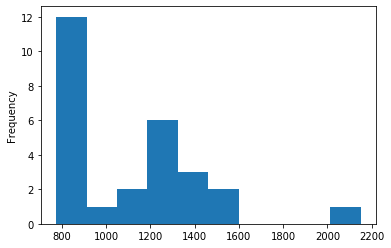

In [68]:
df['2010-08'].plot.hist()

  Now, try to convert the column to integers. Does it work? If not, try converting the NaNs to "indicator values" first.

In [69]:
df = df.fillna(-1) # or df.fillna(-1, inplace=True)
df['2010-08'].astype('int')

0      1250
1        -1
2      2150
3      1375
4        -1
5      1362
6        -1
7      1585
8        -1
9       900
10       -1
11       -1
12       -1
13     1550
14       -1
15     1250
16       -1
17       -1
18      800
19      860
20     1425
21       -1
22       -1
23       -1
24      800
25       -1
26       -1
27      895
28       -1
29       -1
       ... 
354      -1
355      -1
356      -1
357      -1
358      -1
359      -1
360      -1
361      -1
362      -1
363      -1
364      -1
365      -1
366      -1
367      -1
368      -1
369      -1
370      -1
371      -1
372      -1
373      -1
374      -1
375      -1
376      -1
377      -1
378      -1
379      -1
380      -1
381      -1
382      -1
383      -1
Name: 2010-08, Length: 384, dtype: int64

Plot a histogram of the integer version of the column, making sure to filter out the missing values.

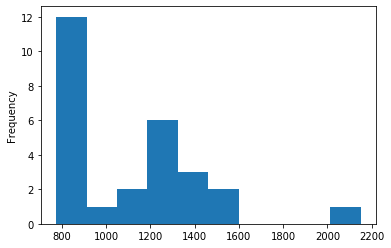

In [71]:
df.loc[df['2010-08'] != -1]['2010-08'].plot.hist()

### c. Column naming

Add a column to the DataFrame column named "mean".

What happens if you try to refer to it as `df.mean`? Why?

In [73]:
df['mean'] = df['2010-08']

In [77]:
df.mean

<bound method DataFrame.mean of                              RegionName  SizeRank  2010-01  2010-02  2010-03  \
0                         United States         0     -1.0     -1.0   1350.0   
1                          New York, NY         1     -1.0     -1.0     -1.0   
2    Los Angeles-Long Beach-Anaheim, CA         2     -1.0   1950.0   1900.0   
3                           Chicago, IL         3     -1.0     -1.0   1345.0   
4                 Dallas-Fort Worth, TX         4     -1.0     -1.0     -1.0   
5                      Philadelphia, PA         5     -1.0   1225.0   1200.0   
6                           Houston, TX         6     -1.0     -1.0     -1.0   
7                        Washington, DC         7     -1.0   1600.0   1575.0   
8             Miami-Fort Lauderdale, FL         8     -1.0     -1.0     -1.0   
9                           Atlanta, GA         9     -1.0    900.0    950.0   
10                           Boston, MA        10     -1.0     -1.0     -1.0   
11      